# Coverage for a binomial test:
## Clopper--Pearson vs Gaussian approximation

We want to check for coverage in case of confidence intervals for a binomial test.

We do this in R because in python there are issues with the binomial probability at low number of trials $n$. Or at least this is what I suspect,  but I haven't fully debugged it yet.


To be able to run R code within jupyter, you must have installed the package `IRkernel` in your R installation (either with `IRkernel::installspec()` or with `install.packages("IRkernel")`, or via your distribution. NOT in RStudio.

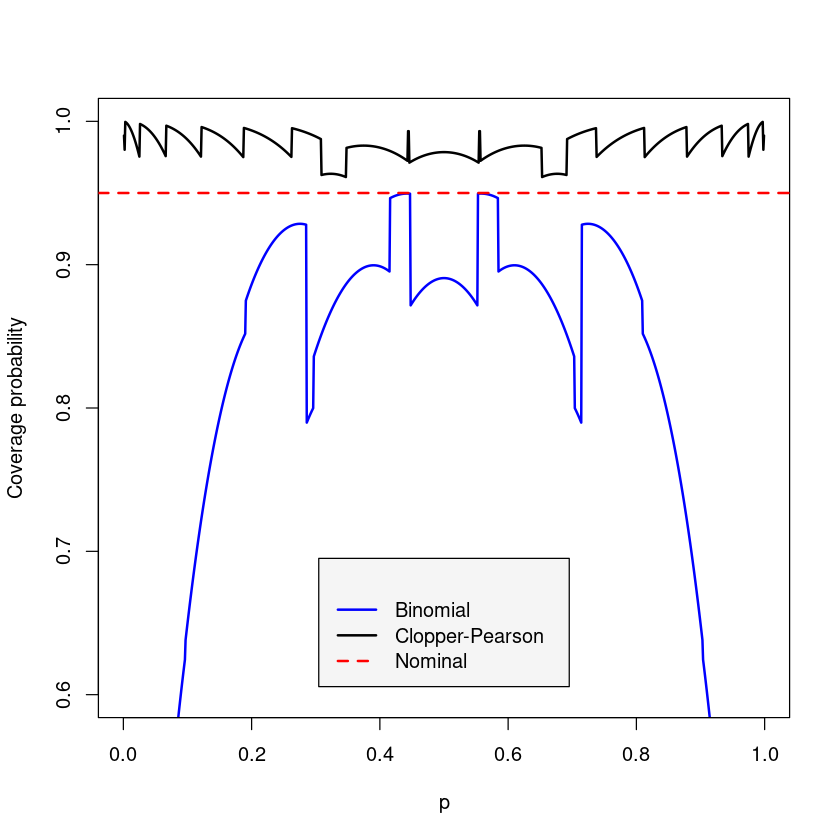

In [21]:
n <- 10
conf.level <- 0.95

cover_binom <- function(p) {
  stopifnot(is.numeric(p))
  stopifnot(length(p) == 1)
  stopifnot(0 <= p & p <= 1)
  x <- 0:n
  fpx <- dbinom(x, n, p)
  phat <- x / n
  crit.val <- qnorm((1 + conf.level) / 2)
  low <- phat - crit.val * sqrt(phat * (1 - phat) / n)
  hig <- phat + crit.val * sqrt(phat * (1 - phat) / n)
  inies <- as.numeric(low <= p & p <= hig)
  sum(inies * fpx)
}


cover_clopper <- function(p) {
  stopifnot(is.numeric(p))
  stopifnot(length(p) == 1)
  stopifnot(0 <= p & p <= 1)
  x <- 0:n
  fpx <- dbinom(x, n, p)
  foo <- lapply(x, binom.test, n = n, p = p,
                conf.level = conf.level)
  low <- sapply(foo, function(x) x$conf.int[1])
  hig <- sapply(foo, function(x) x$conf.int[2])
  inies <- as.numeric(low <= p & p <= hig)
  sum(inies * fpx)
}

p <- seq(0.001, 0.999, 0.001)
plot(p, vapply(p, cover_binom, 0.5), type = "l",
     ylab = "Coverage probability", ylim = c(0.6, 1), col='blue', lwd=2)
lines(p, vapply(p, cover_clopper, 0.5), type='l', col='black', lwd=2)
abline(h = conf.level, lwd=2, col='red', lty = 2)

legend( "bottom", inset=.05, cex = 1, title="",
               c("Binomial", "Clopper-Pearson", "Nominal"), horiz=FALSE,
               lty=c("solid","solid", "dashed"), lwd=c(2,2,2),
               col=c("blue","black","red"), bg="grey96")

